# Self Project-1

## Wine Quality classification

### Loading Necessary libraries and the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df=pd.read_csv('WineQT.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

<gap>

### Taking a look at the data

In [3]:
df.shape

(1143, 13)

In [4]:
df.groupby('quality')['quality'].agg('count')

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

In [5]:
df=df.set_index('Id')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   

    alcohol  quality  
Id                    
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<gap>

### Data Visualization

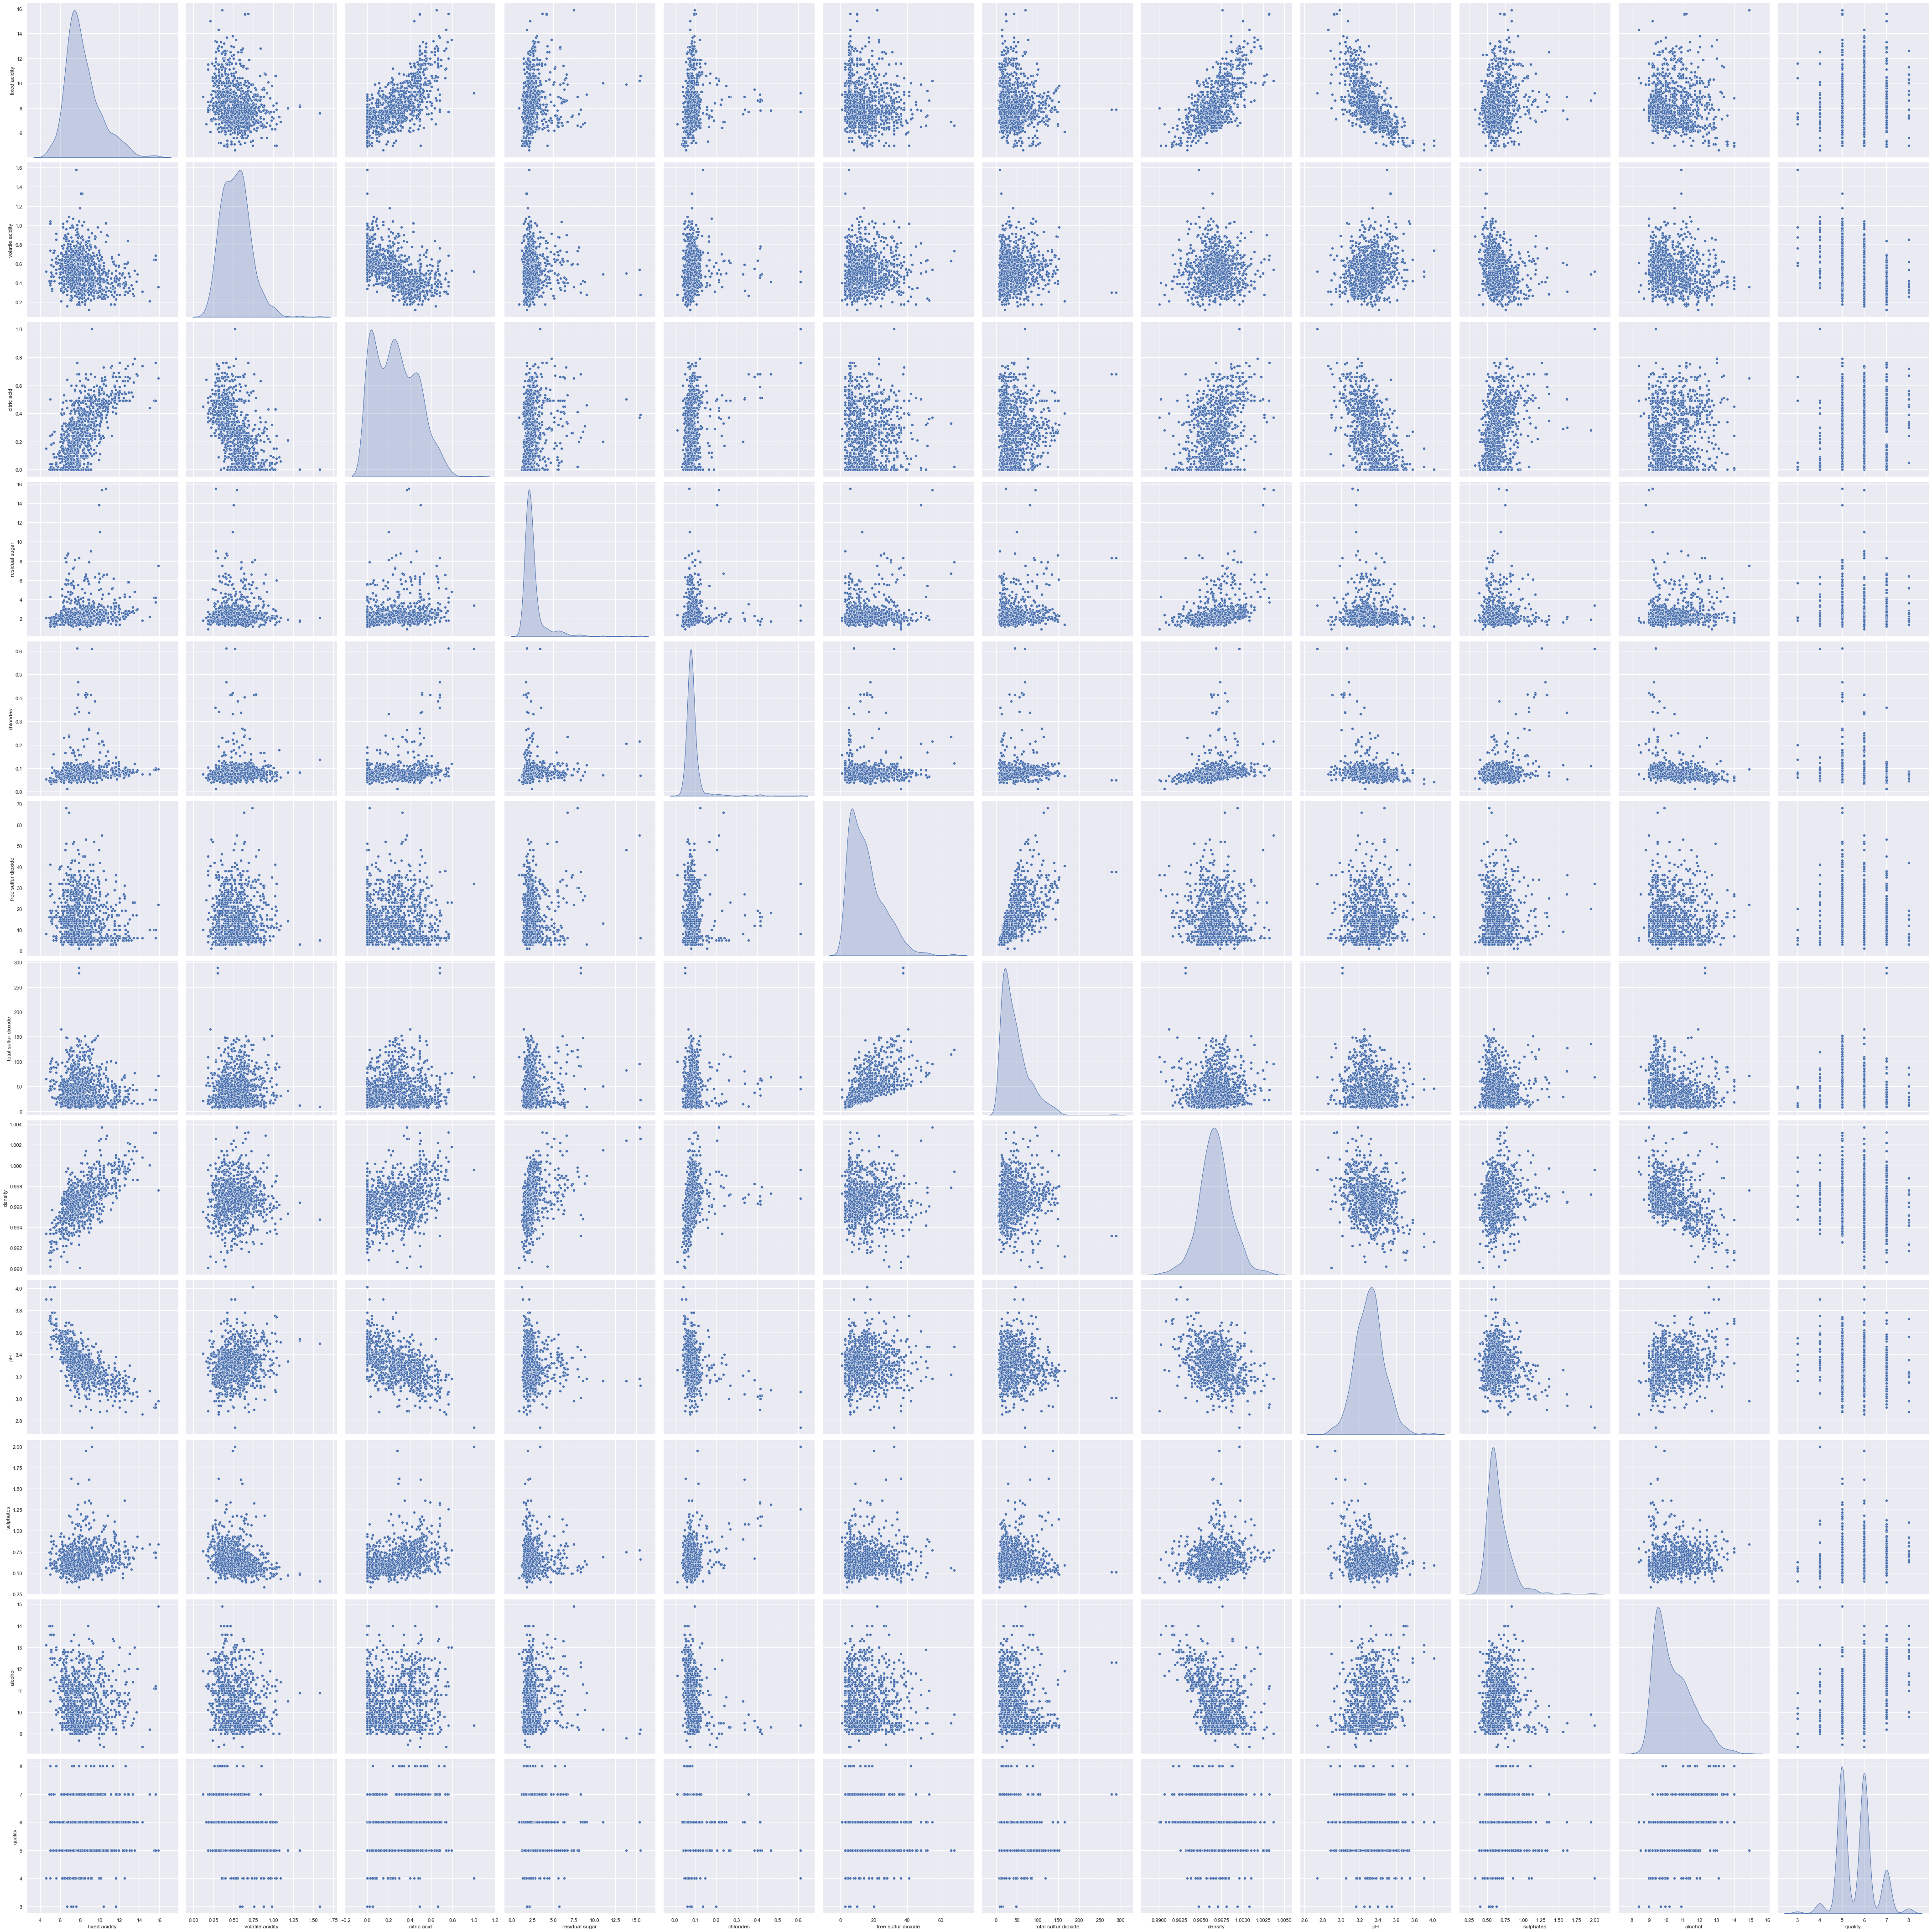

In [8]:
import seaborn as sns
sns.set()
cols=df.columns
sns.pairplot(df[cols],height=5,kind='scatter',diag_kind='kde',palette='husl')
plt.show()

In [9]:
import plotly.graph_objects as go

In [10]:
fig=go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index,values=df['quality'].value_counts(),hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

In [11]:
from scipy import stats

Text(0.5, 0.98, 'Visualizing columns')

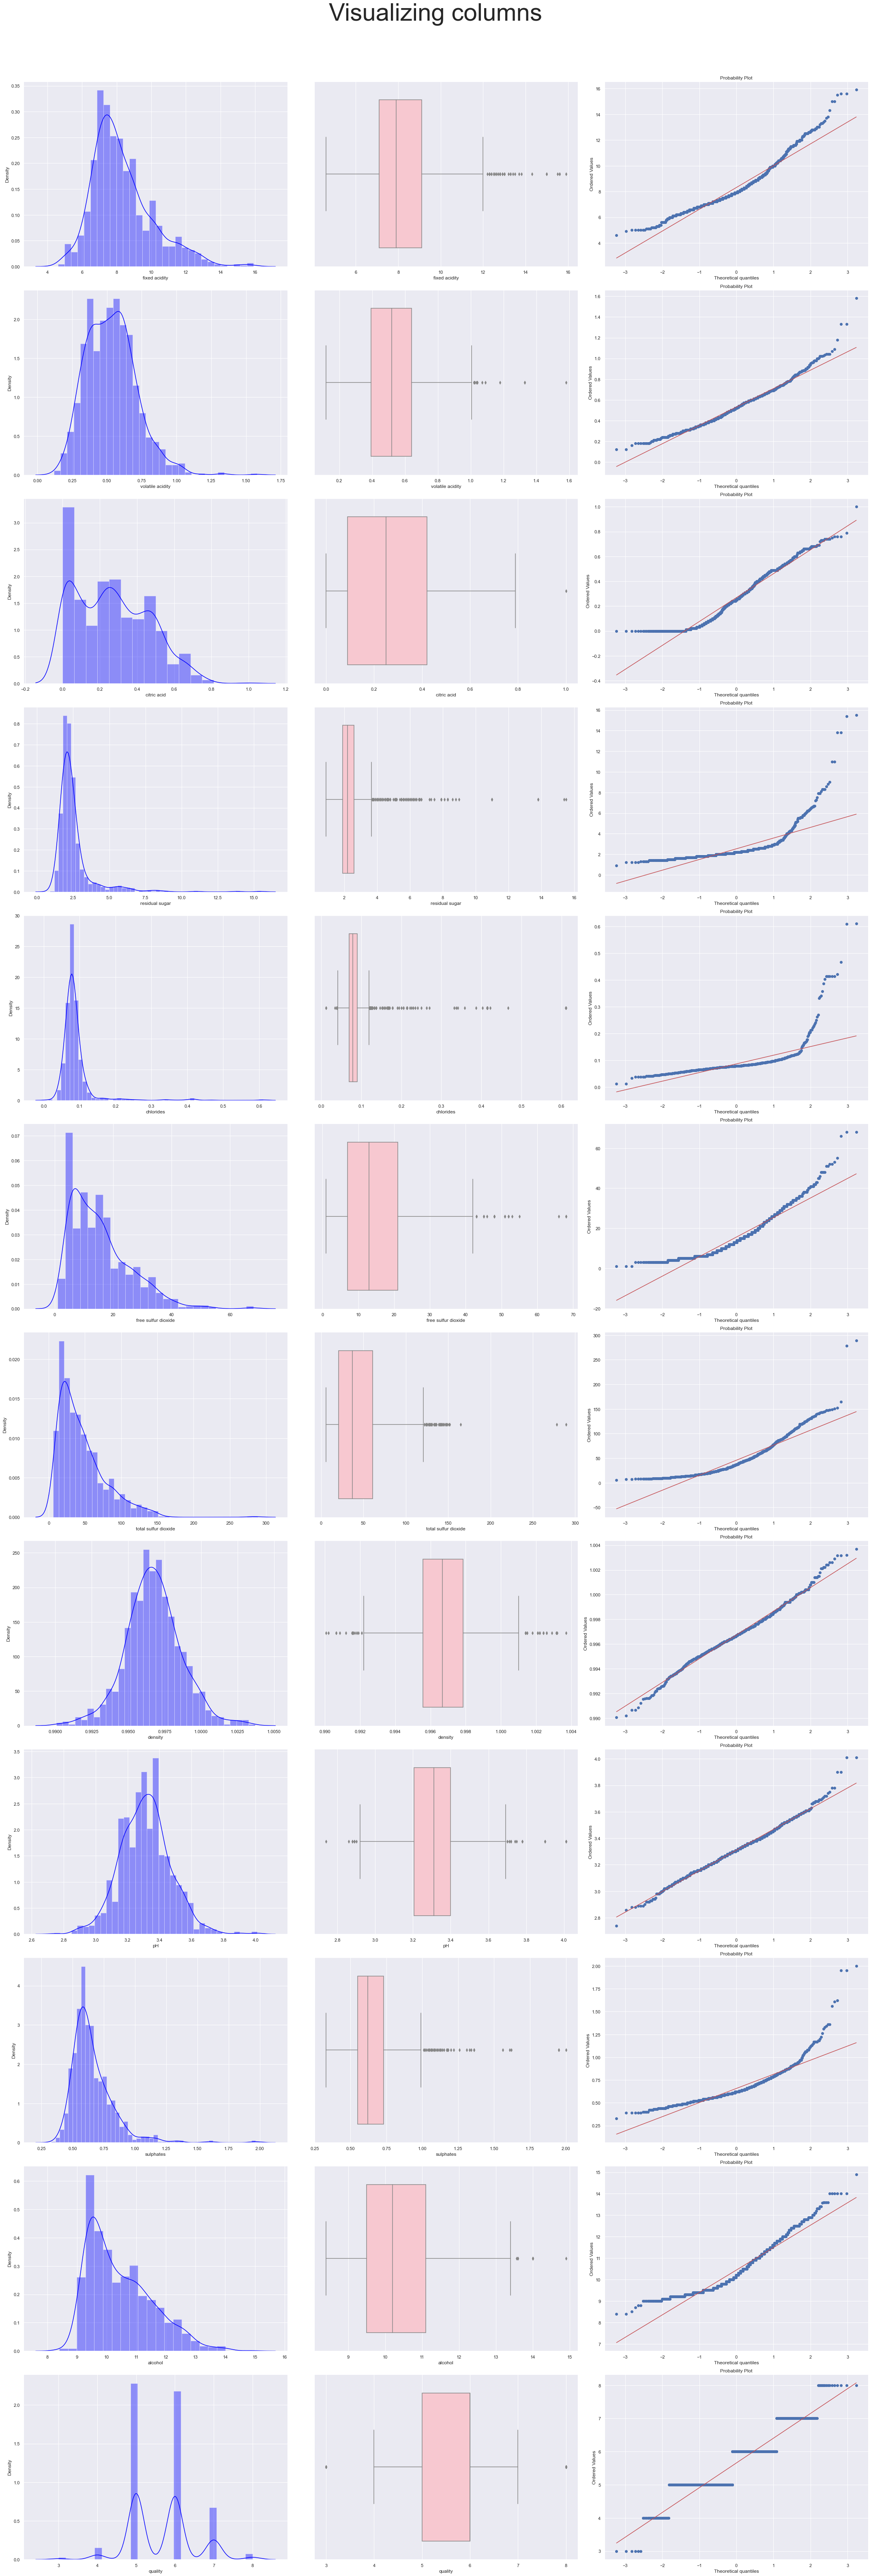

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig,ax=plt.subplots(12,3,figsize=(30,90))
for index, i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0],color='blue')
    sns.boxplot(df[i],ax=ax[index,1],color='pink')
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing columns",fontsize=60)

<gap>

### Preprocessing the data

In [13]:
df.corr()['quality']

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

In [14]:
X=df.drop('quality',axis='columns')
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   

    alcohol  
Id           
0       9.4  
1       9.8  
2       9.8  
3       9.8  
4       9.4

In [15]:
Y=df['quality']
Y

Id
0       5
1       5
2       5
3       6
4       5
       ..
1592    6
1593    6
1594    5
1595    6
1597    5
Name: quality, Length: 1143, dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col=X.columns
s=scaler.fit_transform(X)
scaled_df=pd.DataFrame(s,columns=col)
scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  
3  0.215385  
4  0.153846

<gap>

### Train-Test split and Best Model selection

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_df, Y, test_size=0.2, random_state=10)
x_train.shape

(914, 11)

In [18]:
x_test.shape

(229, 11)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def find_best_model(x,y):
    algos={
        'logistic_regression' : {
            'model' : LogisticRegression(),
            'params' : {
                'penalty' : ['l1','l2'],
                'fit_intercept' : [True,False]
            }
        },
        'SVM' : {
            'model' : svm.SVC(),
            'params': {
                'kernel' : ['linear', 'rbf'],
                'gamma' : ['scale','auto']
             }
        },
        'KNN' : {
            'model' : KNeighborsClassifier(),
            'params' : {
                'n_neighbors' : [5,10],
                'weights' : ['uniform', 'distance']
            }
        },
        'Random_forest_classifier' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'n_estimators' : [100,400],
                'bootstrap' : [True,False]
            }
        }
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(scaled_df,Y)

model  best_score  \
0       logistic_regression    0.625328   
1                       SVM    0.627948   
2                       KNN    0.654148   
3  Random_forest_classifier    0.696943   

                                  best_params  
0    {'fit_intercept': True, 'penalty': 'l2'}  
1         {'gamma': 'scale', 'kernel': 'rbf'}  
2  {'n_neighbors': 10, 'weights': 'distance'}  
3    {'bootstrap': True, 'n_estimators': 100}

*Random Forest classifier works the best among other models with a score of: 0.696943 with given in the dataframe above*

In [25]:
rf_clf=RandomForestClassifier(n_estimators=100,bootstrap=True)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
rf_clf.score(x_test,y_test)

0.6506550218340611

<gap>

### Making predictions

In [43]:
Y_pred=rf_clf.predict(x_test)
Y_pred

array([5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5,
       7, 7, 6, 5, 6, 6, 7, 7, 5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 6, 5,
       6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5,
       5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       7, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 6, 7, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6,
       6, 6, 5, 7, 5, 6, 6, 8, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 7, 6, 5, 5, 7, 7, 6, 5, 5, 5, 6, 6, 5,
       6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 7,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 7,
       5, 6, 6, 7, 5, 6, 6, 6, 5], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)

In [34]:
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  6,  3,  0,  0],
       [ 0,  0, 70, 23,  1,  0],
       [ 0,  0, 18, 61,  5,  0],
       [ 0,  0,  1, 17, 17,  0],
       [ 0,  0,  0,  4,  1,  1]], dtype=int64)

<AxesSubplot:>

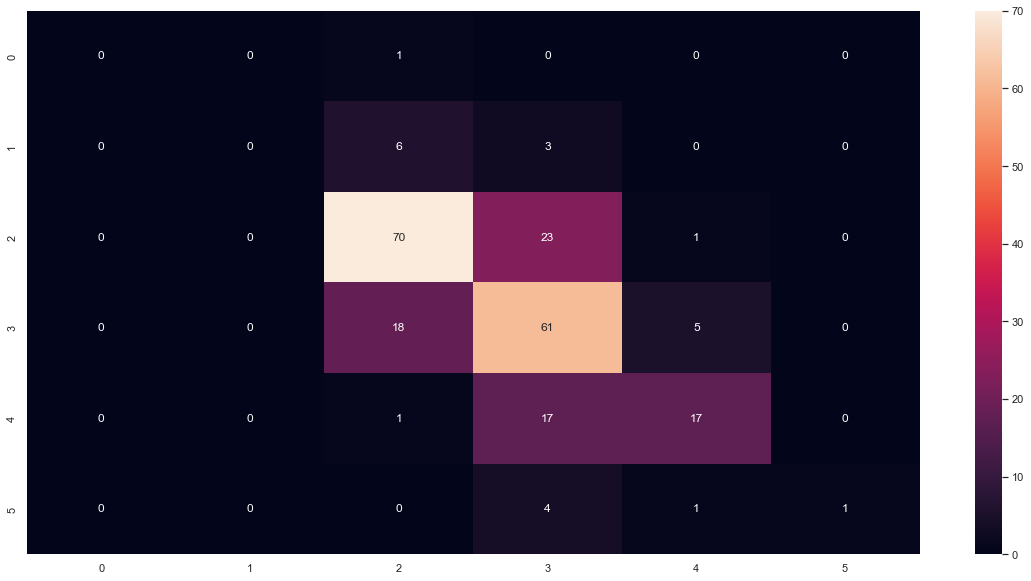

In [35]:
sns.heatmap(cm,annot=True)

***Though the model still has many inaccuracies still it is the best performing among other models that we tested.***

<Gap>

### Saving the model for deployment

In [36]:
import pickle

In [37]:
with open('wine_quality.pickle','wb') as f:
    pickle.dump(rf_clf,f)

In [38]:
import json

In [41]:
columns_wine={
    'data_columns' : [col.lower() for col in scaled_df.columns]
}
with open("columns_wine.json",'w') as f:
    f.write(json.dumps(columns_wine))